In [1]:
import mne
import numpy as np

### Info-Dump


- 2 Task: Regularity, Luminance
- 2 Angle: Frontoparallel, Perspective
  
- 2 Regularity: Symmetry, Asymmetry -> Discriminate symmetry from asymmetry
- 2 Luminance: Dark, Light          -> Discriminate dark from light stimuli 

Task and Angle were blocked. -> One data file per combination (Lumfron, Lumperp etc.)

- Lumfront
- LumPerp
- RegFront
- RegPerp

Events in each task: "Combination of reflection and color conditions"
- RAND_DARK
- RAND_LIGHT
- REF_DARK
- REF_LIGHT

Hypothesis of what the event types are (not 100% sure!!)
| Event label  | Likely meaning                                   | Context                           |
| ------------ | ------------------------------------------------ | --------------------------------- |
| `RAND_DARK`  | Asymmetrical (random) pattern, dark luminance    | Regularity task or Luminance task |
| `RAND_LIGHT` | Asymmetrical (random) pattern, light luminance   | ""                                |
| `REF_DARK`   | Symmetrical (reflected) pattern, dark luminance  | ""                                |
| `REF_LIGHT`  | Symmetrical (reflected) pattern, light luminance | ""                                |

In Regularity task blocks:
- Participants attend to symmetry, ignore luminance (but events still mark both features).

In Luminance task blocks:
- Participants attend to light/dark, ignore regularity (but events still mark both features).


After above tasks, this was done to check EEG data quality in VR compared to monitor (not included in hypothesis testing)
- Signalscreen  -> Monitor
- Signalvr      -> With VR headset on



### Questions

Are there only 4 events/stimuli per file/task type?? Why is it recorded for a much longer time then?

In [6]:
from mne_bids import BIDSPath, read_raw_bids

bids_root = r"ds005841-download"

subject_id = "001"
task = "regfront"    # lumfront, lumperp, regfront, regperp, signalscreen, signalvr -> Was ist signalscreen, signalvr?

bids_path = BIDSPath(
    subject=subject_id,
    task=task,
    datatype="eeg",
    suffix="eeg",
    extension=".bdf",
    root=bids_root
)

print(bids_path.fpath)

raw = read_raw_bids(bids_path)
raw.load_data()

ds005841-download\sub-001\eeg\sub-001_task-regfront_eeg.bdf
Extracting EDF parameters from d:\lisa-\Universität_2\Master\2. Semester\EEG\EEG_Project\ds005841-download\sub-001\eeg\sub-001_task-regfront_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from ds005841-download\sub-001\eeg\sub-001_task-regfront_events.tsv.
Reading 0 ... 183807  =      0.000 ...   358.998 secs...


C:\Users\lisa-\AppData\Local\Temp\ipykernel_19976\3601363766.py:19: RuntimeWarning: Did not find any channels.tsv associated with sub-001_task-regfront.

The search_str was "ds005841-download\sub-001\**\eeg\sub-001*channels.tsv"
  raw = read_raw_bids(bids_path)


<RawEDF | sub-001_task-regfront_eeg.bdf, 73 x 183808 (359.0 s), ~102.4 MiB, data loaded>

In [3]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)

Used Annotations descriptions: [np.str_('RAND_DARK'), np.str_('RAND_LIGHT'), np.str_('REF_DARK'), np.str_('REF_LIGHT')]
{np.str_('RAND_DARK'): 1, np.str_('RAND_LIGHT'): 2, np.str_('REF_DARK'): 3, np.str_('REF_LIGHT'): 4}


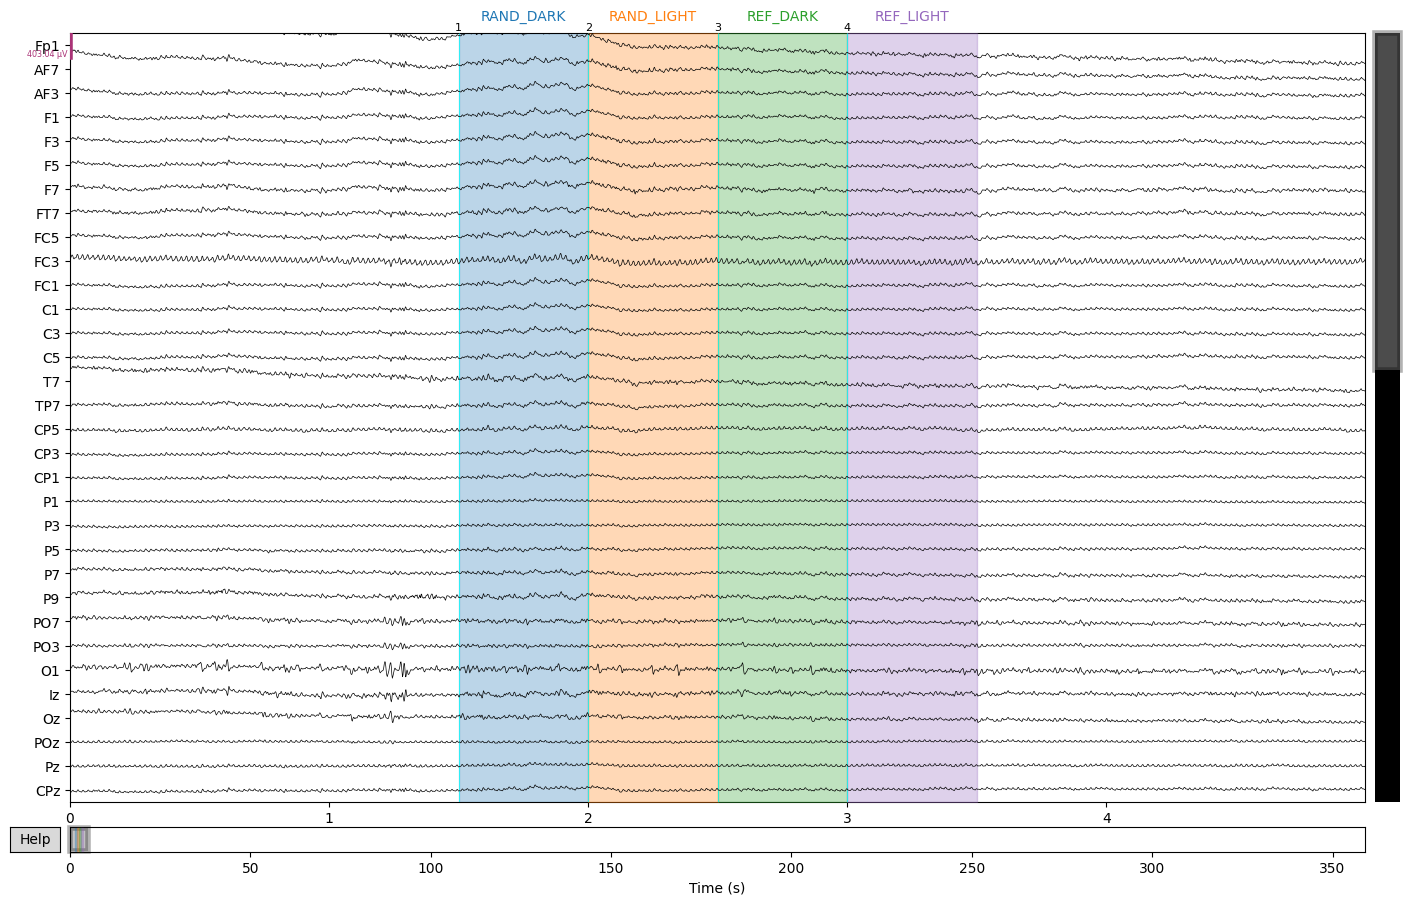

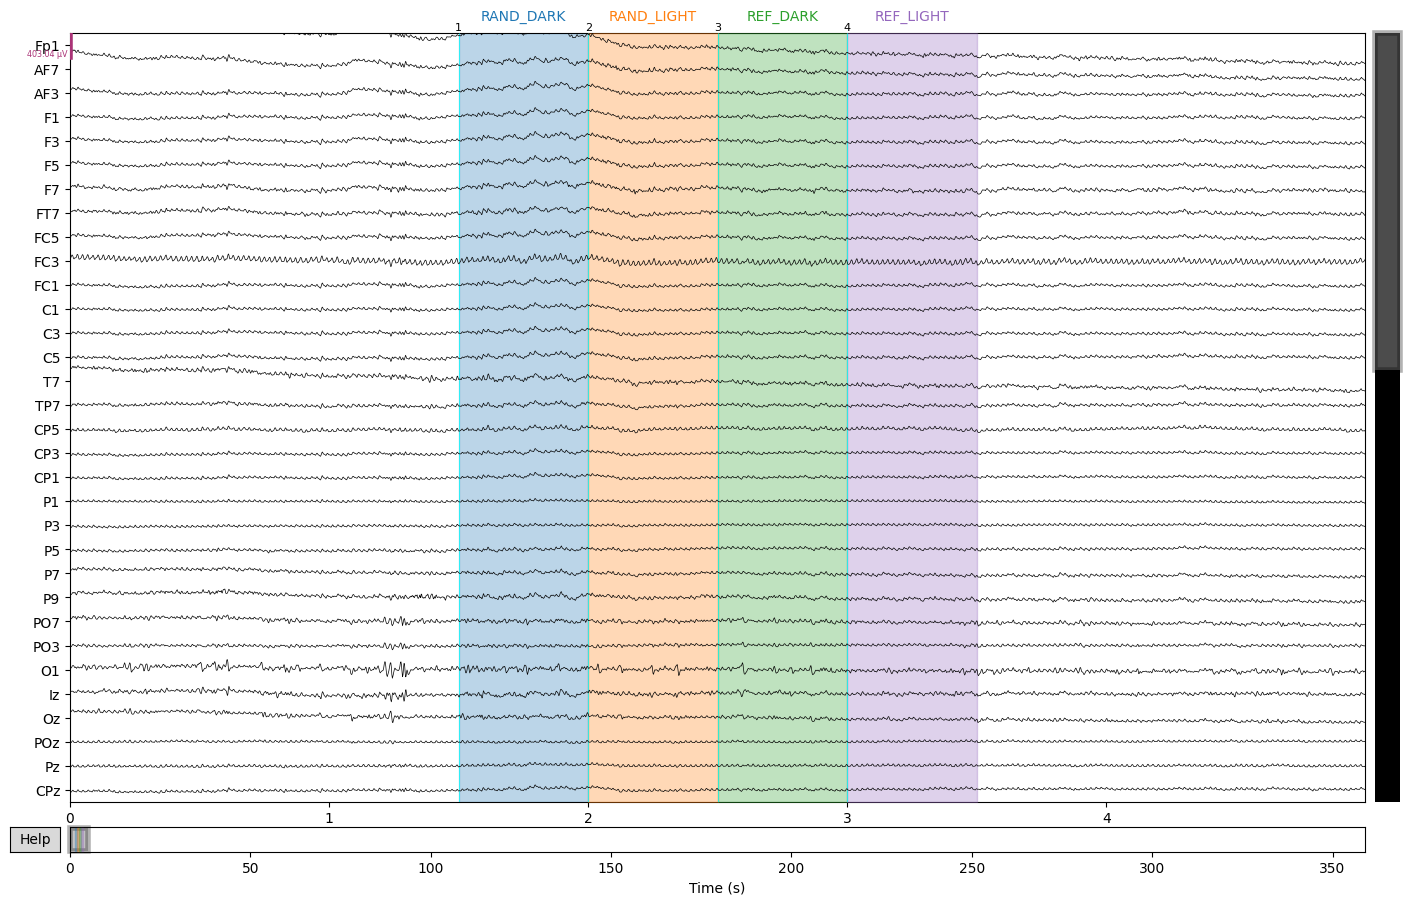

In [7]:
#%matplotlib qt
raw.plot(events=events, block=True, scalings='auto', duration=5, n_channels=32)